In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

In [2]:
def readJavaArray(filename):
    f1 = open(filename)
    f2 = f1.read()
    f2 = f2.replace("{","[")
    f2 = f2.replace("}","]")
    #exec("Arr = np.array(" + f2 + ")")
    Arr = eval("np.array(" + f2 + ")")
    return Arr

In [3]:
Pmat = readJavaArray("PFGAP/Results/Proximities/gunpoint_prox.txt")
y_train = readJavaArray("PFGAP/Results/ytrain/gunpoint_ytrain.txt")

In [4]:
PMat = (Pmat + Pmat.transpose())/2
Dis = np.ones(PMat.shape) - PMat

In [5]:
embedding = MDS(n_components=2, metric=True, dissimilarity='precomputed', random_state=0)
X_transformed = embedding.fit_transform(Dis)

In [6]:
X1 = np.array([X_transformed[i] for i in range(X_transformed.shape[0]) if y_train[i]==1]).transpose()
X2 = np.array([X_transformed[i] for i in range(X_transformed.shape[0]) if y_train[i]==2]).transpose()
eX = [X1,X2]

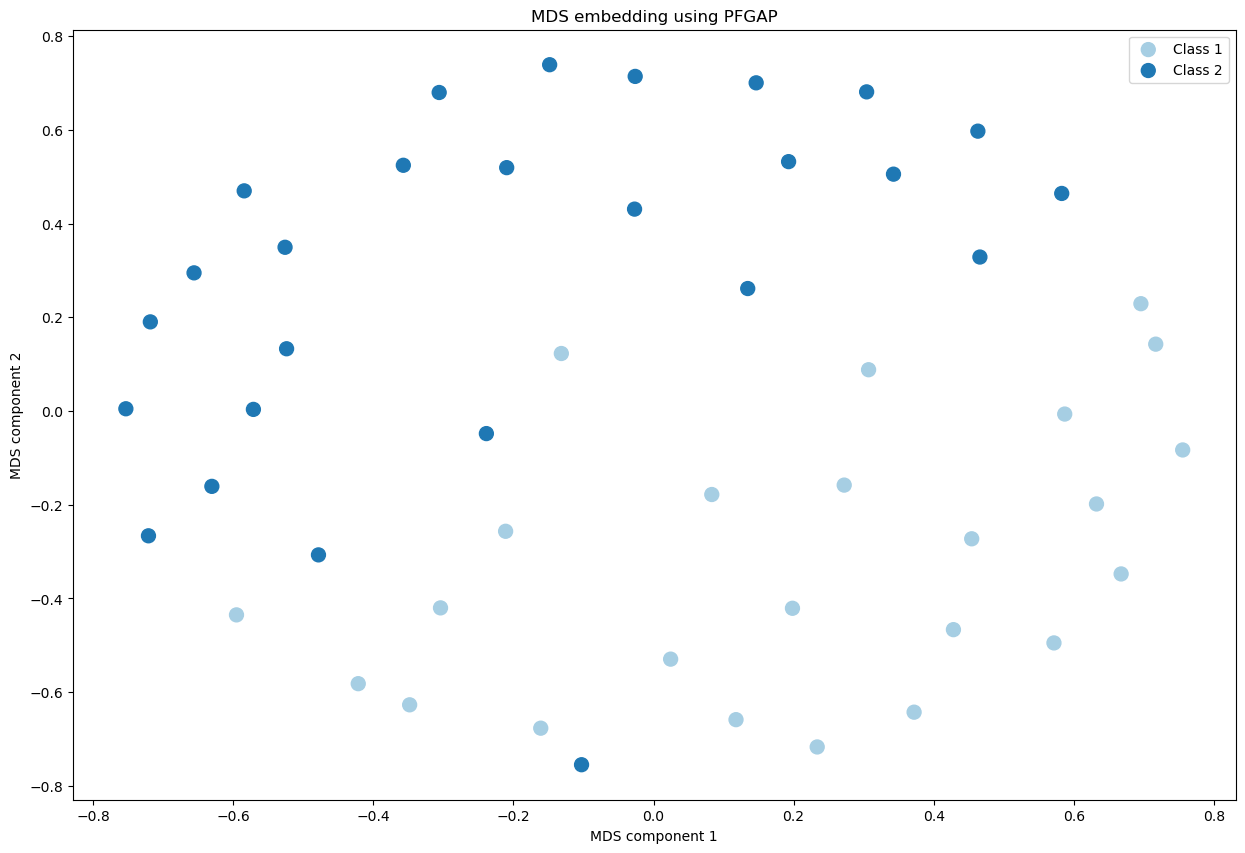

In [7]:
cmap = plt.cm.Paired
plt.figure(figsize = (15,10))
for i in range(1,3):
    plt.scatter(eX[i-1][0], eX[i-1][1], s=100, c=cmap([i-1 for j in range(eX[i-1].shape[1])]), 
                label="Class {:g}".format(i))
    
plt.legend()
plt.xlabel('MDS component 1')
plt.ylabel('MDS component 2')
plt.title('MDS embedding using PFGAP')
plt.show()

In [8]:
KM = KMeans(n_clusters=2, random_state=0)
kmeans = KM.fit(X_transformed)
y_preds = KM.predict(X_transformed)

In [9]:
y_preds = np.array([(-1)*(y)+2 for y in y_preds]) #0 to 2, 1 to 1.

In [10]:
# Here's the kmeans accuracy.
rights = [1 for i in range(len(y_train)) if y_train[i]==y_preds[i]]
score = sum(rights)/len(y_train)
print(score)

0.94
